In [2]:
from numpy import linspace, sin, cos, pi, absolute, real, imag, arctan, arctan2
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

In [3]:
def dft(x):
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Exercício 1
Utilizando uma função senoidal de uma única frequência $f(t)=sin(2\pi ft)$:

a) Criar uma função em python que realize a função de DFT

In [4]:
def dft(x):
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

b) Amostrar a função $f(t)$ de forma a não introduzir aliasing

In [11]:
# Sampling rate
fs = 32  # Hz

# Time is from 0 to 1 seconds, but leave off the endpoint, so
# that 1.0 seconds is the first sample of the *next* chunk
length = 1  # second
N = fs * length
t = linspace(0, length, num=N, endpoint=False)

# Generate a sinusoid at frequency f
f1 = 8  # Hz
a = 3.0 * sin(2 * pi * f1 * t)

b.I) Plotar a função $f[n]$

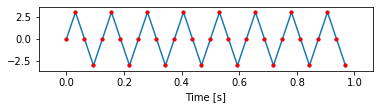

In [12]:
# Plot signal, showing how endpoints wrap from one chunk to the next
plt.subplot(3, 1, 1)
plt.plot(t, a, '.-')
plt.plot(t, a, 'r.')  # first sample of next chunk
plt.margins(0.1, 0.1)
plt.xlabel('Time [s]')
plt.show()

c) Converter estas amostras para o domínio da frequência utilizando a função DFT

d) Utilize a função **numpy.fft.fft** para fazer o mesmo exercício

In [6]:
## DFT
ffta = fft(a)

## real and imaginary part
re = real(ffta)
im = imag(ffta)

e) Como normalizar a magnitude?

In [7]:
## normalized amplitude
ampl = 2 * 1/N * abs(ffta)

d.1) Plotar $|F[k]|$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


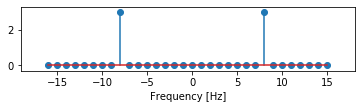

In [8]:
# FFT frequency bins
freqs = fftfreq(N, 1/fs)

# Plot shifted data on a shifted axis
plt.subplot(3, 1, 2)
plt.stem(fftshift(freqs), fftshift(ampl))
plt.margins(0.1, 0.1)
plt.xlabel('Frequency [Hz]')
plt.show()

d.2) Plotar fase: $atan\frac{Im(F[k])}{Re(F[k])}$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


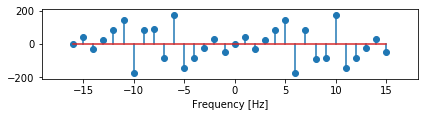

In [9]:
plt.subplot(3, 1, 3)
plt.stem(fftshift(freqs), fftshift(arctan2(im, re)*180/pi))
plt.margins(0.1, 0.1)
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

# Exercício 2
Agora, utilizando uma função senoidal de três frequências $f(t)=sin(2\pi f_1t) + cos(2\pi f_2t) + sin(2\pi f_3t)$:

a) Amostrar a função $f(t)$ de forma a não introduzir aliasing 

In [10]:
# Sampling rate
fs = 64  # Hz

# Time is from 0 to 1 seconds, but leave off the endpoint, so
# that 1.0 seconds is the first sample of the *next* chunk
length = 1  # second
N = fs * length
t = linspace(0, length, num=N, endpoint=False)

# Generate a sinusoids
f1 = 8   # Hz
f2 = 12  # Hz
f3 = 20  # Hz
a = 3.0 * sin(2 * pi * f1 * t) + 1.5 * cos(2 * pi * f2 * t) + 0.5 * sin(2 * pi * f3 * t) 

a.1) Plotar $f[n]$

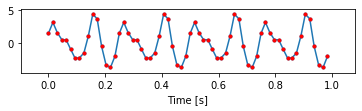

In [11]:
# Plot signal, showing how endpoints wrap from one chunk to the next
plt.subplot(3, 1, 1)
plt.plot(t, a, '.-')
plt.plot(t, a, 'r.')  # first sample of next chunk
plt.margins(0.1, 0.1)
plt.xlabel('Time [s]')
plt.show()

b) Converter essas amostras para o domínio da frequência

In [12]:
## DFT
ffta = fft(a)

## normalized amplitude
ampl = 2 * 1/N * abs(ffta)

## real and imaginary part
re = real(ffta)
im = imag(ffta)

b.1) Plotar $|F[k]|$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


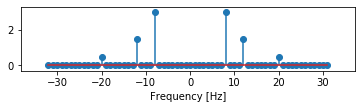

In [13]:
# FFT frequency bins
freqs = fftfreq(N, 1/fs)

# Plot shifted data on a shifted axis
plt.subplot(3, 1, 2)
plt.stem(fftshift(freqs), fftshift(ampl))
plt.margins(0.1, 0.1)
plt.xlabel('Frequency [Hz]')
plt.show()

b.2) Plotar fase: $atan\frac{Im(F[k])}{Re(F[k])}$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


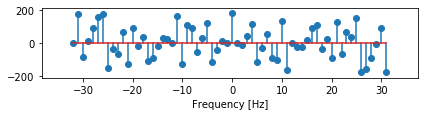

In [14]:
plt.subplot(3, 1, 3)
plt.stem(fftshift(freqs), fftshift(arctan2(im, re)*180/pi))
plt.margins(0.1, 0.1)
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()